<a href="https://colab.research.google.com/github/LimDoHyeon/PKNU-MachineLearning/blob/main/ML_high_level_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 다층 신경망의 한계점
- 층을 깊이 쌓은 신경망은 더 정교한 기능을 하는 것이 아니라 학습을 못 하는 현상이 나타남
  - 손실 함수의 경사를 계산하여 연결강도를 수정하는 일이 제대로 동작하지 않는 것
  - 오차가 아래 단계(이전 단계)로 역전파될수록 점점 경사값 신호가 0으로 떨어지는(소실되는) **사라지는 경사(vanishing gradient)** 문제가 발생하기 때문
  - 반대로, 기울기가 아래 단계로 내려가면서 급격히 커지며 하위 단계의 연결강도가 지나치게 커지게 되는 **폭발하는 경사(exploding gradient)** 문제도 존제

- 문제 원인 분석
  - sigmoid 함수는 양 끝으로 갈 수록 기울기, 즉 미분값이 0에 가까워지는데 오차 역전파는 미분값을 곱해 오차를 아래로 전달하는 것이므로, 활성화 함수가 포화 상태에 가까워질수록 오차 전파가 잘 이루어지지 않음

- 이를 대체하기 위해 하이퍼볼릭 탄젠트(tanh)를 사용
    - 이는 활성하 함수값이 0 부근인 곳에서도 미분치가 (보다)큰 값으로 유지됨
    - 은닉층의 결과가 0인 상태에 도달해도 오차를 잘 전파한다
  
- 이러한 이유로 여러 층을 겹처 신경망을 구현할 때 시그모이드에서 탈피해 다양한 활성화 함수를 사용하기 시작함
- 새로운 활성화 함수들은 생물 신경세포 모방 보다는 계산상의 이점을 강화하는 방향으로 발전함

# 8.2 심층 신경망 학습의 돌파구 - 연결강도 초기화
- 일반적으로 사용되는 균일 분포의 난수를 이용해 연결강도를 정규화할 경우
  - 각 계층의 노드 수가 달라지면 입력에서  출력으로 가는 순전파 신호와, 출력에서 입력으로 내려오는 **오차 역전파 신호의 분산이 왜곡**되어 전달됨 -> 사라지는 경사/폭발하는 경사 문제 발생
- 이러한 문제를 피하기 위해서는 **각 은닉층의 크기가 동일해야 한다**
  - 서로 다른 크기의 층을 연결해야 할 수도 있다.
  - 이러한 연결강도 초기화 방법을 글로럿 초기화(glorot initialization) 또는 세이비어 초기화(Xavier initialization)이라고 부름
  - **텐서플로우의 케라스 API는 일반적으로 글로럿 초기화를 디폴트 초기화 방법으로 사용
      
<참고>
- 논리장치에 입력되는 신호의 개수를 '팬-인'이라 부름
- 연산이 끝나고 출력되는 신호의 개수를 '팬 아웃'이라 부름


# 8.3 활성화 함수의 다양화
> 주로 ReLU와 그 변형들을 사용 -> 이들이 오차 기울기를 잘 전달할 수 있는 것으로 알려짐

1. leaky(새는) ReLU 함수
  - 입력이 음수인 곳에서도 0을 출력하지 않고 1보다 작은 기울기로 약간의 신호를 내어 보냄
  - 이 구간의 미분은 a가 되고, 이 값은 0이 아니기 때문에 오차를 내려 보내어 연결강도 조정하는 일이 가능

2. ELU 모델
  - 음수 구간에서 선형 모델을 사용하지 않고 지수 함수를 사용
    - a = 1이면 어디서나 미분 가능 (장점)
    - 계산 비용이 ReLU보다 큼 (단점)


# 8.4 텐서플로우로 시작하는 Hello world - MNIST 예제

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train 데이터의 형태: ', x_train.shape)
print('x_train[0] 데이터의 형태:', x_train[0].shape)
print('y_train 데이터의 형태:', y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train 데이터의 형태:  (60000, 28, 28)
x_train[0] 데이터의 형태: (28, 28)
y_train 데이터의 형태: (60000,)


In [2]:
num = x_train[0]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]), end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

y_train[0] = 5


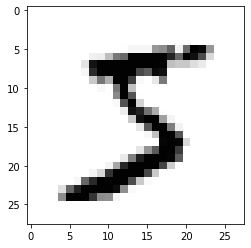

In [3]:
plt.imshow(num, cmap='Greys', interpolation='nearest') #nearest 보간한 회색조 영상
print('y_train[0] =', y_train[0]) #데이터의 의미/유형/명칭/레이블 등

# 8.8 keras로 순차 심층 신경망 구축하기
<구축 과정>
1. 신경망 구조, 특성 등 상세 설계 (활성화 함수, 최적화 함수, 손실 함수, 측정 방법 등)
2. 6만 개의 사진 x_train(데이터)을 다층 신경망에 입력, 결과 확인
3. y_train의 레이블 정보와 비교
4. 시험/평가 (신경망의 정확도 계산)

순차 신경망은 사이킷런이나 텐서플로(케라스)를 사용하는 것이 좋다.

In [4]:
x_train, x_test = x_train / 255, x_test / 255  #입력값 정규화

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

# 학습을 위한 최적화 함수, 손실 함수등을 가진 모델을 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2265 - accuracy: 0.9340
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.9731
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0604 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0424 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0319 - accuracy: 0.9900


In [5]:
#훈련 결과 모형 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
#test
print('신경망 모델의 학습 결과: ')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('test 데이터의 손실값', eval_loss, 'test 데이터의 정확도', eval_acc)

신경망 모델의 학습 결과: 
313/313 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9763
test 데이터의 손실값 0.07622060179710388 test 데이터의 정확도 0.9763000011444092


In [7]:
import numpy as np

def softmax(a):
  exp_of_a = np.exp(a)
  sum_exp = np.sum(exp_of_a)
  y = exp_of_a / sum_exp
  return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))

#소프트맥스 함수의 최대값
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

#소프트맥스 함수의 입력값을 두 배로 증가시켜보자
print("\n\n\n")
a = np.array([0.5, 4.1, 2.5, 5.6, 1.2]) * 2
print('신경망의 예측값 :', a)
print('소프트맥스 함수의 출력 :', softmax(a))
print('소프트맥스 함수의 최대값 :', np.max(softmax(a)))

신경망의 예측값 : [0.5 4.1 2.5 5.6 1.2]
소프트맥스 함수의 출력 : [0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]
소프트맥스 함수의 최대값 : 0.7772704668966948




신경망의 예측값 : [ 1.   8.2  5.  11.2  2.4]
소프트맥스 함수의 출력 : [3.53328547e-05 4.73259126e-02 1.92910850e-03 9.50566364e-01
 1.43281791e-04]
소프트맥스 함수의 최대값 : 0.9505663642857384


> 소프트맥스 함수는 최대값을 더욱 활성화하고 작은 값을 억제하는 효과.

# 8.11 원-핫 인코딩과 평균제곱 오차
> softmax 출력의 최대값과 비교해볼 것
평가 : y와 t의 차이 = 오차 => 제곱 오차의 합 SSE

In [10]:
from keras.utils import to_categorical

data = np.array([0, 1, 2, 3, 4])
print('인코딩할 원본 데이터', data)
encoded = to_categorical(data)
print('원-핫 인코딩된 데이터 :')
print(encoded)

인코딩할 원본 데이터 [0 1 2 3 4]
원-핫 인코딩된 데이터 :
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [13]:
import numpy as np

target = np.array([0, 0, 0, 1, 0])
y_hat = np.array([0.005, 0.173, 0.035, 0.777, 0.01])

def mse(y, t):
  return ((y-t)**2).mean()

print('y_hat과 target과의 오차 :', mse(y_hat, target))

y_hat과 target과의 오차 : 0.016201599999999997


> 신경망의 예측값이 [0.2, 0.3, 0.4, 0.01, 0.09]와 같이 정답과 크게 다르면 평균제곱 오차는 0.2556과 같이 늘어난다.

In [14]:
#정답에서 많이 벗어난 other_y_hat 추정지
other_y_hat = np.array([0.2, 0.3, 0.4, 0.01, 0.09])

#other_y_hat 추정치와 정답과의 오차를 알아보자
print('other_y_hat과 target과의 오차 :', mse( other_y_hat, target ))

other_y_hat과 target과의 오차 : 0.25564


정답에서 많이 벗어날 수록 큰 오차값이 나오고, 신경망의 학습도 그에 맞춰 큰 폭으로 이루어진다.

# 8.12 평균 제곱오차와 크로스엔트로피(교차 엔트로피)
- 크로스엔트로피는 분류 모델을 평가할 때보다 의미있다
- 이를 위해 학습 데이터의 정답을 원-핫 인코딩으로 표현한다.
- mse를 통한 오차 구하기가 가능합에도 크로스엔트로피를 사용하는 이유는, **신경망은 학습의 오류를 줄이는 과정이기 때문이다.**
  - 벌점에 해당하는 오차값이 더 큰 크로스엔트로피 오차를 신경망의 오차로 사용하는 게 학습 속도를 더 빠르게 할 수 있음